In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\Blood_samples_dataset_balanced_2(f).csv") 
df = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\blood_samples_dataset_test.csv") 
display(df.head())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [71]:
#encode categorical labels (Disease column)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
convertedData = df.copy()  
convertedData['Disease']= le.fit_transform(df['Disease'].astype(str))
display(convertedData.head())

# information about the dataset
print(df.shape)  
print(df.info()) 
print(df.describe()) 
print(df['Disease'].unique()) 
print(df['Disease'].value_counts()) 

# Check and remove duplicates
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()

#get information related null values
display(df.isnull().sum())

# Impute numerical features (if any missing)
numerical_cols = df.columns[:-1] 
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())#fill null data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,4
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,3
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,3


(486, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin         

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [78]:
corr = convertedData.corr()
corr.style.background_gradient(cmap='coolwarm')

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
Glucose,1.000000,0.041716,-0.033918,-0.044161,0.014082,0.099692,0.017898,-0.021956,0.115377,0.020463,-0.051997,0.057148,0.053395,0.017041,-0.026571,0.059606,-0.038671,-0.003912,0.008495,0.055358,0.042778,0.034157,0.030084,-0.057289,-0.131351
Cholesterol,0.041716,1.000000,-0.082814,-0.018645,-0.037447,0.089261,0.070890,0.003759,0.078588,0.101201,-0.047341,-0.038441,-0.019163,0.062282,-0.050572,-0.014955,-0.039932,0.013919,0.006140,0.081820,0.031888,0.007317,-0.019628,0.000469,-0.032747
Hemoglobin,-0.033918,-0.082814,1.000000,-0.071351,-0.053571,-0.043260,-0.060376,0.020023,-0.014829,-0.014435,0.043210,-0.039921,-0.022898,-0.023256,-0.025783,-0.031939,-0.027649,0.020690,0.055712,-0.037836,-0.065433,0.029496,0.010196,-0.038146,-0.041784
Platelets,-0.044161,-0.018645,-0.071351,1.000000,0.006125,-0.071980,0.019951,0.029870,0.023604,-0.027918,-0.006257,0.132941,-0.059136,0.067048,0.010490,0.020551,0.026365,0.036883,-0.031587,-0.009001,-0.018892,0.003540,0.006910,-0.032405,-0.102648
White Blood Cells,0.014082,-0.037447,-0.053571,0.006125,1.000000,0.089398,0.027318,0.050894,-0.009425,-0.015990,-0.077885,0.010977,-0.027616,0.005510,-0.014424,-0.084988,0.029464,-0.031254,-0.025951,0.017316,0.009744,-0.149898,-0.050551,-0.075215,0.241368
Red Blood Cells,0.099692,0.089261,-0.043260,-0.071980,0.089398,1.000000,0.030484,-0.006270,-0.063587,-0.002481,0.005705,-0.080650,-0.060273,-0.018568,0.010618,-0.011538,-0.028023,0.042918,0.035138,-0.004586,0.056263,-0.031191,-0.043829,0.017739,0.254369
Hematocrit,0.017898,0.070890,-0.060376,0.019951,0.027318,0.030484,1.000000,0.014085,-0.012708,-0.007661,-0.050393,0.035657,-0.075840,-0.024565,0.021707,-0.037721,0.046428,-0.003095,0.015224,-0.002026,-0.060802,0.028159,-0.053756,0.013921,0.179136
Mean Corpuscular Volume,-0.021956,0.003759,0.020023,0.029870,0.050894,-0.006270,0.014085,1.000000,0.056634,0.097303,0.023160,-0.020803,0.045616,-0.051330,0.070058,0.040009,0.022514,0.042710,-0.005969,-0.037105,-0.068362,-0.038353,0.066936,0.054672,0.024293
Mean Corpuscular Hemoglobin,0.115377,0.078588,-0.014829,0.023604,-0.009425,-0.063587,-0.012708,0.056634,1.000000,0.053716,-0.066917,0.018533,0.026032,0.034992,0.017746,0.007591,-0.052265,-0.037074,0.006245,-0.023613,-0.083603,-0.036914,0.142494,-0.127203,-0.106686
Mean Corpuscular Hemoglobin Concentration,0.020463,0.101201,-0.014435,-0.027918,-0.015990,-0.002481,-0.007661,0.097303,0.053716,1.000000,-0.085051,0.007691,0.051672,-0.064274,-0.055663,0.023053,0.022143,-0.027161,-0.076798,0.032895,0.036256,-0.013566,0.005117,0.038146,-0.012350


In [80]:
# Identify highly correlated features (|corr| > 0.8)
threshold = 0.8
high_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            high_corr.add(colname)

print(f"Highly correlated features to consider dropping: {high_corr}")
# Drop correlated features (manual decision based on domain knowledge)
df_reduced = convertedData.drop(high_corr, axis=1)
display(df_reduced.head())

Highly correlated features to consider dropping: set()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,4
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,3
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,3


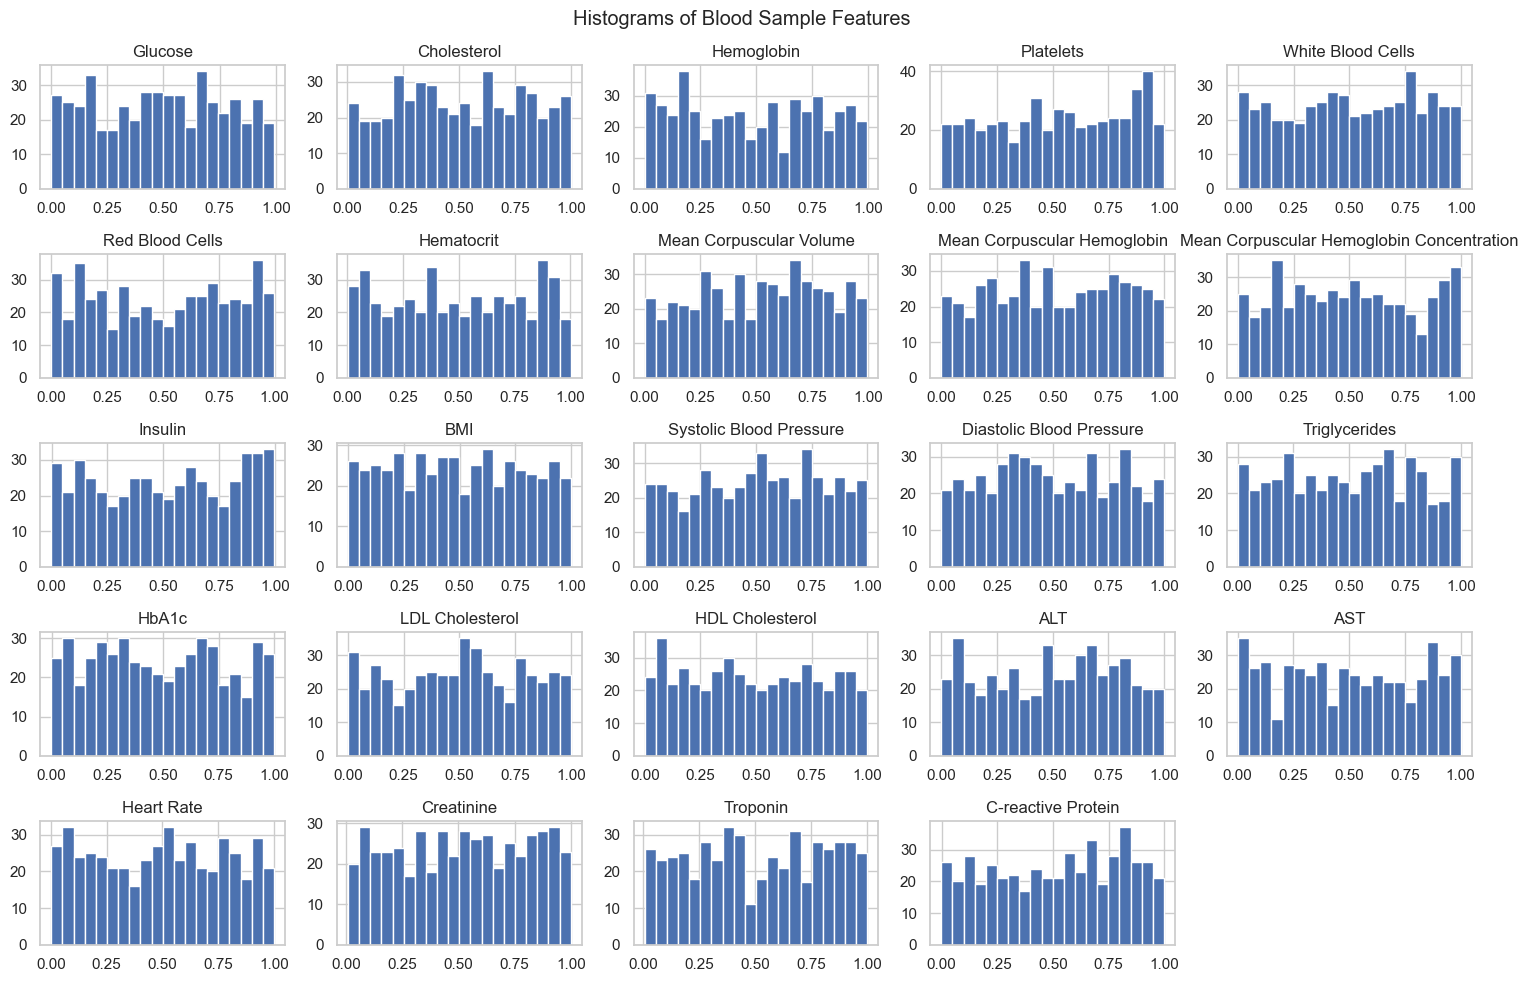

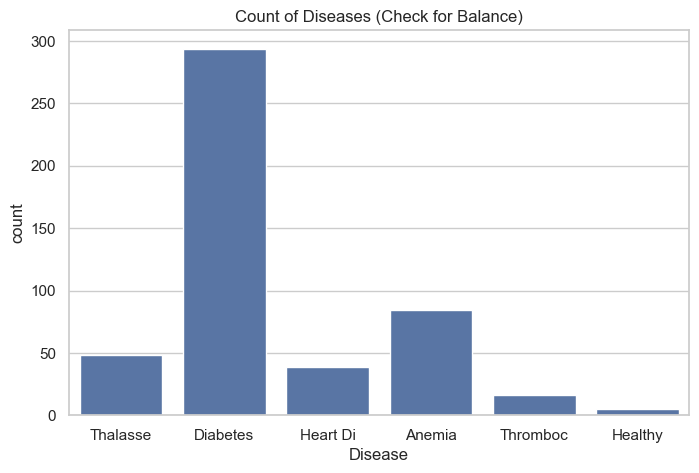

In [ ]:
sns.set(style="whitegrid")

# Histograms for all numerical features
numerical_cols = df.columns[:-1]  # Exclude 'Disease'
df[numerical_cols].hist(bins=20, figsize=(15, 10), layout=(5, 5))
plt.suptitle('Histograms of Blood Sample Features')
plt.tight_layout()
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Disease', data=df)
plt.title('Count of Diseases (Check for Balance)')
plt.show()

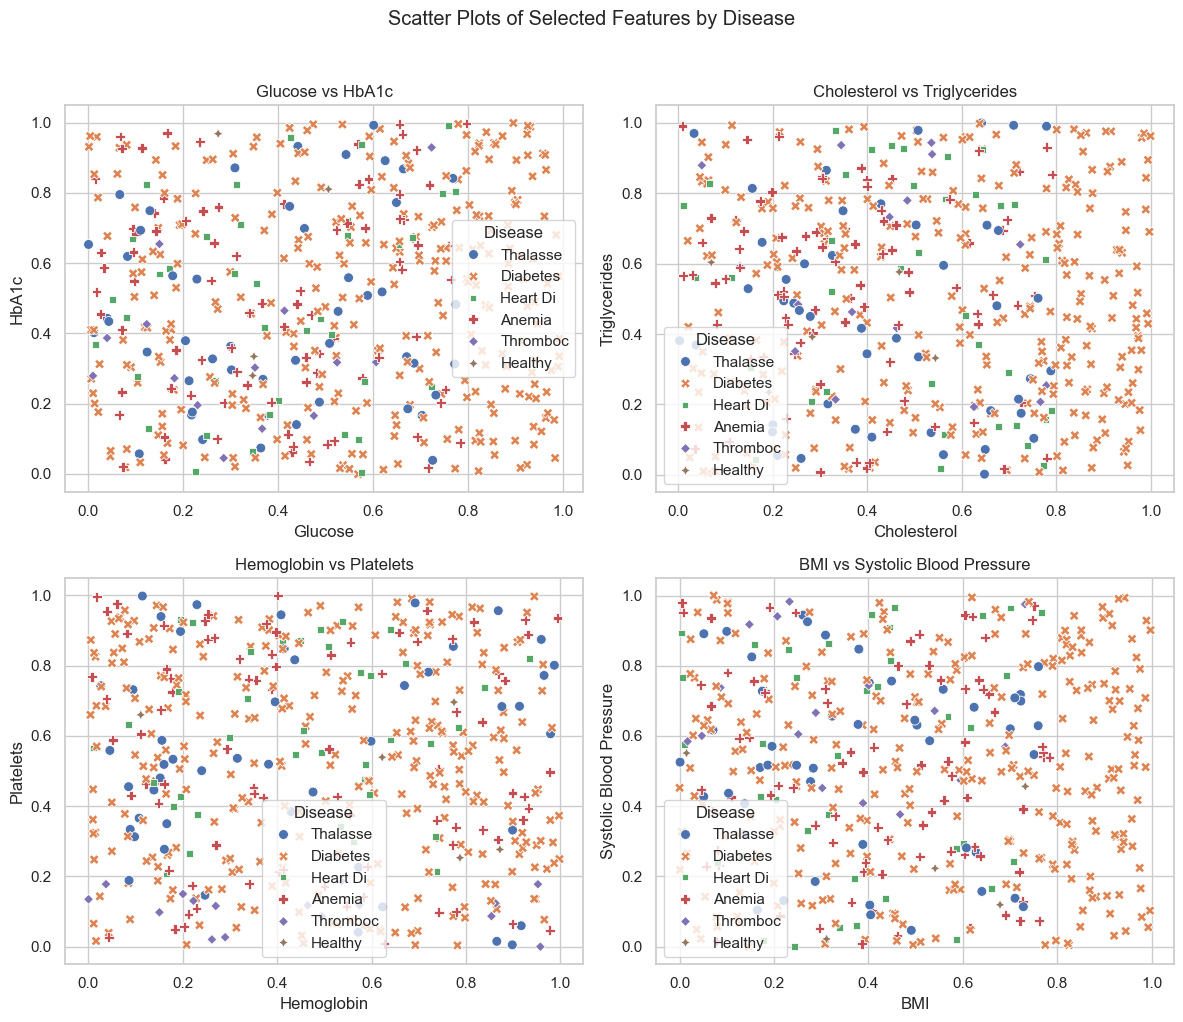

In [55]:
# Define feature pairs to plot (customize based on domain knowledge)
feature_pairs = [
    ('Glucose', 'HbA1c'),
    ('Cholesterol', 'Triglycerides'),
    ('Hemoglobin', 'Platelets'),
    ('BMI', 'Systolic Blood Pressure')
]

# Create scatter plots
plt.figure(figsize=(12, 10))
for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=x_feature, y=y_feature, hue='Disease', data=df, style='Disease', s=50)
    plt.title(f'{x_feature} vs {y_feature}')
plt.suptitle('Scatter Plots of Selected Features by Disease', y=1.02)
plt.tight_layout()
plt.show()

In [81]:
X = df_reduced.drop(columns=["Disease"])
Y = df_reduced["Disease"]
display(X,Y)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.521000,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.082744,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


0      4
1      1
2      3
3      1
4      3
      ..
481    1
482    3
483    0
484    1
485    1
Name: Disease, Length: 486, dtype: int64

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(x_train,x_test,y_train,y_test)
# x_train = X
# y_train = Y
# dfTest = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\blood_samples_dataset_test.csv") 
# convertedDataTest = dfTest.copy()  
# convertedDataTest['Disease']= le.fit_transform(dfTest['Disease'].astype(str))
# x_test = convertedDataTest.drop(columns=["Disease"])
# y_test = convertedDataTest["Disease"]

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
371,0.227544,0.715747,0.576835,0.781309,0.353402,0.588895,0.916228,0.317233,0.747938,0.579443,...,0.141062,0.007502,0.713480,0.474368,0.739457,0.681977,0.288540,0.872668,0.620586,0.906227
184,0.188946,0.123223,0.204592,0.533899,0.694335,0.426035,0.258581,0.316355,0.471404,0.541948,...,0.717282,0.783651,0.412987,0.377378,0.916762,0.372511,0.747864,0.608672,0.200558,0.437554
203,0.127785,0.469761,0.934751,0.819004,0.566730,0.968995,0.244324,0.177216,0.559587,0.752448,...,0.587284,0.130424,0.219534,0.371671,0.771779,0.451746,0.269235,0.236134,0.884240,0.877710
417,0.072049,0.441702,0.527310,0.427437,0.313237,0.091450,0.271391,0.146508,0.057220,0.893430,...,0.123066,0.410754,0.560627,0.877554,0.032056,0.461090,0.163835,0.408799,0.172445,0.081302
335,0.095330,0.779913,0.737941,0.359542,0.818453,0.001261,0.515448,0.163588,0.762587,0.239534,...,0.930779,0.697846,0.034070,0.614759,0.065098,0.940200,0.507614,0.503459,0.775992,0.461342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.156994,0.865823,0.919349,0.324161,0.409110,0.095224,0.737304,0.958232,0.478268,0.945873,...,0.242567,0.134962,0.580653,0.988494,0.962706,0.145804,0.242600,0.831771,0.345977,0.464074
11,0.663802,0.038065,0.979127,0.605864,0.871663,0.568124,0.257929,0.687518,0.944962,0.574744,...,0.368577,0.868354,0.999567,0.577318,0.696599,0.581920,0.835900,0.860678,0.871461,0.393091
390,0.655562,0.833005,0.326188,0.423442,0.997400,0.855643,0.377598,0.753460,0.685868,0.566545,...,0.334771,0.661978,0.514063,0.690254,0.126165,0.684436,0.996321,0.104171,0.939089,0.270195
337,0.698236,0.554042,0.863520,0.787620,0.018057,0.187126,0.108759,0.346688,0.745750,0.180570,...,0.191684,0.607156,0.116048,0.958836,0.617160,0.185766,0.725210,0.569429,0.644055,0.397886


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
183,0.939751,0.518718,0.383736,0.932357,0.657247,0.492957,0.248355,0.745074,0.486735,0.292075,...,0.784234,0.489397,0.851113,0.124779,0.201184,0.179842,0.528034,0.631793,0.978861,0.004994
283,0.847977,0.974299,0.715166,0.275985,0.457422,0.488663,0.918205,0.440147,0.249527,0.644560,...,0.387852,0.197419,0.564086,0.764009,0.923334,0.950916,0.591482,0.635654,0.869289,0.478675
361,0.644579,0.294858,0.813305,0.966273,0.060735,0.435994,0.542382,0.705545,0.919701,0.160427,...,0.925324,0.539476,0.556690,0.595846,0.684072,0.414569,0.346081,0.542474,0.967428,0.281777
339,0.246144,0.844844,0.191681,0.764694,0.540176,0.791496,0.817887,0.901031,0.304295,0.078513,...,0.443045,0.046877,0.614863,0.110849,0.184723,0.554329,0.519858,0.566052,0.936754,0.953479
458,0.731039,0.798574,0.064779,0.934075,0.508452,0.150435,0.852971,0.807297,0.358365,0.385227,...,0.312043,0.606619,0.077821,0.049407,0.176354,0.549874,0.531343,0.014725,0.591764,0.730973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.153240,0.547302,0.072281,0.848989,0.340108,0.240870,0.866219,0.211416,0.012020,0.266550,...,0.721607,0.318417,0.508038,0.202719,0.057361,0.217296,0.512029,0.475096,0.809907,0.718676
246,0.559510,0.973602,0.824024,0.893752,0.752467,0.938172,0.579746,0.889801,0.368169,0.880749,...,0.394483,0.424747,0.168701,0.864097,0.669190,0.798387,0.917990,0.688755,0.944841,0.127300
104,0.040890,0.537565,0.150853,0.098008,0.678409,0.710623,0.856706,0.375763,0.090937,0.191726,...,0.910925,0.386956,0.721926,0.006786,0.842879,0.283941,0.678737,0.163478,0.020672,0.158798
98,0.368560,0.725927,0.381962,0.519358,0.449094,0.723771,0.681525,0.525752,0.242848,0.970406,...,0.175022,0.269206,0.969733,0.649599,0.280192,0.233048,0.434978,0.860392,0.278596,0.725026


371    3
184    1
203    3
417    0
335    0
      ..
185    1
11     4
390    1
337    1
16     1
Name: Disease, Length: 388, dtype: int64

183    1
283    1
361    1
339    1
458    1
      ..
315    1
246    1
104    5
98     4
209    1
Name: Disease, Length: 98, dtype: int64

In [58]:
clf = DecisionTreeClassifier(
    criterion='entropy',         
    random_state=0
)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [59]:
y_pred = clf.predict(x_test)

Feature: 0, Score: 0.12862
Feature: 1, Score: 0.19450
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.06098
Feature: 4, Score: 0.07818
Feature: 5, Score: 0.07816
Feature: 6, Score: 0.07263
Feature: 7, Score: 0.03738
Feature: 8, Score: 0.05779
Feature: 9, Score: 0.04046
Feature: 10, Score: 0.12609
Feature: 11, Score: 0.10979
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00897
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00644
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


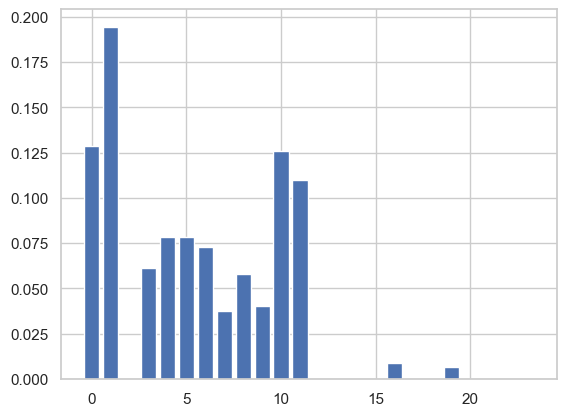

,Cholesterol,Glucose,Insulin,BMI,White Blood Cells,Red Blood Cells,Hematocrit,Platelets,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Mean Corpuscular Volume,LDL Cholesterol,AST,Hemoglobin,Systolic Blood Pressure
183,0.518718,0.939751,0.885901,0.244520,0.657247,0.492957,0.248355,0.932357,0.486735,0.292075,0.745074,0.851113,0.179842,0.383736,0.741416
283,0.974299,0.847977,0.886899,0.601920,0.457422,0.488663,0.918205,0.275985,0.249527,0.644560,0.440147,0.564086,0.950916,0.715166,0.471780
361,0.294858,0.644579,0.925953,0.840825,0.060735,0.435994,0.542382,0.966273,0.919701,0.160427,0.705545,0.556690,0.414569,0.813305,0.729571
339,0.844844,0.246144,0.669015,0.430605,0.540176,0.791496,0.817887,0.764694,0.304295,0.078513,0.901031,0.614863,0.554329,0.191681,0.932634
458,0.798574,0.731039,0.322095,0.816691,0.508452,0.150435,0.852971,0.934075,0.358365,0.385227,0.807297,0.077821,0.549874,0.064779,0.900354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.547302,0.153240,0.509248,0.970944,0.340108,0.240870,0.866219,0.848989,0.012020,0.266550,0.211416,0.508038,0.217296,0.072281,0.678603
246,0.973602,0.559510,0.967259,0.911880,0.752467,0.938172,0.579746,0.893752,0.368169,0.880749,0.889801,0.168701,0.798387,0.824024,0.093742
104,0.537565,0.040890,0.653572,0.689776,0.678409,0.710623,0.856706,0.098008,0.090937,0.191726,0.375763,0.721926,0.283941,0.150853,0.569571
98,0.725927,0.368560,0.388761,0.750723,0.449094,0.723771,0.681525,0.519358,0.242848,0.970406,0.525752,0.969733,0.233048,0.381962,0.547077


,Cholesterol,Glucose,Insulin,BMI,White Blood Cells,Red Blood Cells,Hematocrit,Platelets,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Mean Corpuscular Volume,LDL Cholesterol,AST,Hemoglobin,Systolic Blood Pressure
371,0.715747,0.227544,0.208517,0.443679,0.353402,0.588895,0.916228,0.781309,0.747938,0.579443,0.317233,0.713480,0.681977,0.576835,0.910363
184,0.123223,0.188946,0.524831,0.935087,0.694335,0.426035,0.258581,0.533899,0.471404,0.541948,0.316355,0.412987,0.372511,0.204592,0.277453
203,0.469761,0.127785,0.404187,0.204290,0.566730,0.968995,0.244324,0.819004,0.559587,0.752448,0.177216,0.219534,0.451746,0.934751,0.419273
417,0.441702,0.072049,0.128265,0.180608,0.313237,0.091450,0.271391,0.427437,0.057220,0.893430,0.146508,0.560627,0.461090,0.527310,0.722961
335,0.779913,0.095330,0.483535,0.362146,0.818453,0.001261,0.515448,0.359542,0.762587,0.239534,0.163588,0.034070,0.940200,0.737941,0.554245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.865823,0.156994,0.601870,0.200482,0.409110,0.095224,0.737304,0.324161,0.478268,0.945873,0.958232,0.580653,0.145804,0.919349,0.328566
11,0.038065,0.663802,0.404411,0.164725,0.871663,0.568124,0.257929,0.605864,0.944962,0.574744,0.687518,0.999567,0.581920,0.979127,0.104154
390,0.833005,0.655562,0.617244,0.820298,0.997400,0.855643,0.377598,0.423442,0.685868,0.566545,0.753460,0.514063,0.684436,0.326188,0.348886
337,0.554042,0.698236,0.870785,0.163377,0.018057,0.187126,0.108759,0.787620,0.745750,0.180570,0.346688,0.116048,0.185766,0.863520,0.662636


In [95]:
importance = clf.feature_importances_
feature_names = X.columns
# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v:.5f}')
plt.bar([x for x in range(len(importance))], importance)
plt.show()#importance graph
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_k = 15
top_features = feature_importance_df['Feature'].head(top_k).values
X_train_reduced = x_train[top_features]
X_test_reduced = x_test[top_features]
display(X_test_reduced,X_train_reduced)

In [86]:
clfFS = DecisionTreeClassifier(
    criterion='entropy',         
    random_state=0
)
clfFS.fit(X_train_reduced,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [87]:
newPred = clfFS.predict(X_test_reduced)
display(newPred)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 0,
       1, 3, 4, 0, 1, 1, 3, 1, 1, 1, 1, 5, 0, 0, 1, 0, 1, 1, 1, 3, 4, 1,
       1, 1, 1, 1, 1, 5, 1, 0, 0, 1, 1, 3, 1, 1, 0, 1, 3, 4, 1, 0, 1, 0,
       1, 5, 1, 0, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 3, 0,
       5, 1, 1, 0, 1, 1, 1, 5, 4, 1])

In [88]:
print(classification_report(y_test,newPred,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        62
           2       0.00      0.00      0.00         1
           3       0.88      0.88      0.88         8
           4       0.86      0.75      0.80         8
           5       0.67      1.00      0.80         4

    accuracy                           0.96        98
   macro avg       0.73      0.77      0.75        98
weighted avg       0.95      0.96      0.96        98



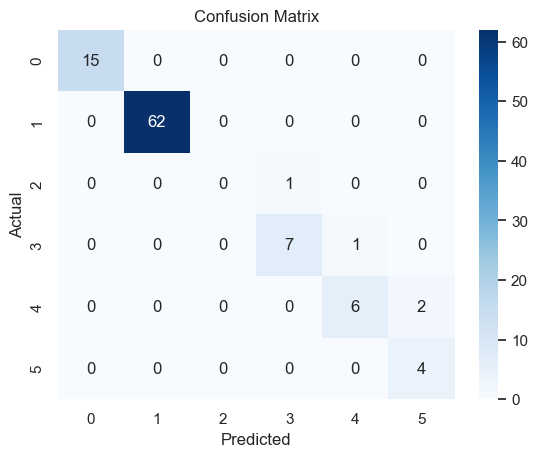

In [92]:
sns.heatmap(confusion_matrix(y_test,newPred), annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [93]:
mse = mean_squared_error(y_test,newPred)
r2Score = r2_score(y_test,newPred)
print("MSE : ",mse,"\nR2 Score : ",r2Score,"\nAccuracy:", accuracy_score(y_test, newPred))

MSE :  0.04081632653061224 
R2 Score :  0.9759036144578314 
Accuracy: 0.9591836734693877


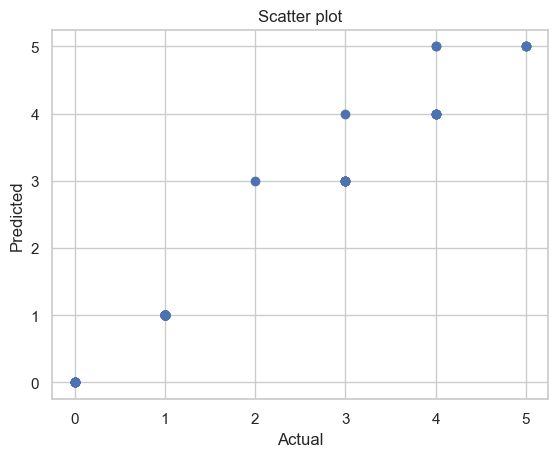

In [94]:
plt.scatter(y_test,newPred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter plot")
plt.show()